In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

12


In [6]:
df = df.drop_duplicates()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

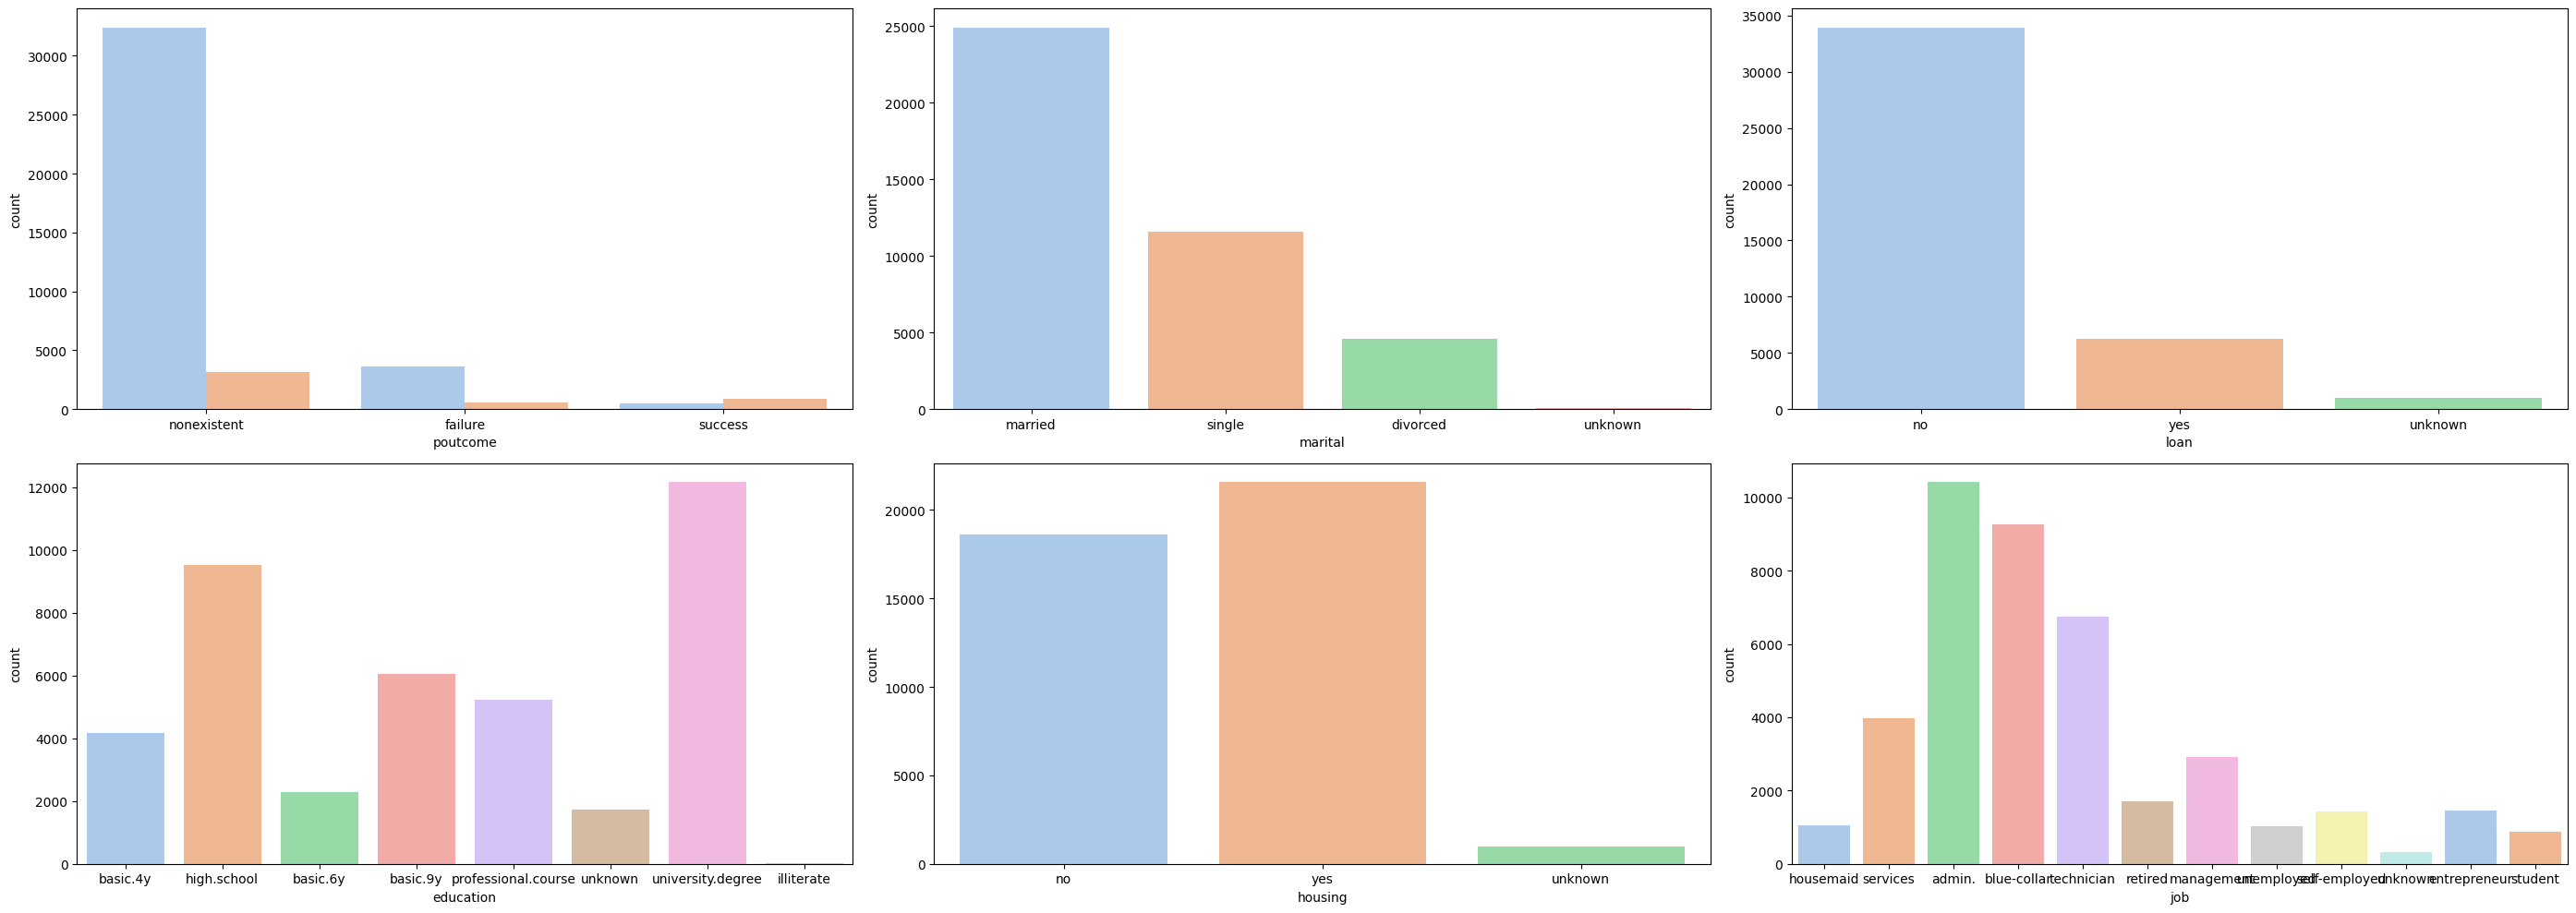

In [8]:
fig, axis = plt.subplots(2, 3, figsize = (28, 10))

sns.countplot(ax = axis[0, 0], data = df, x = "poutcome", palette='pastel', hue= "y", legend=False)
sns.countplot(ax = axis[0, 1], data = df, x = "marital", palette='pastel', hue= "marital", legend=False)
sns.countplot(ax = axis[1, 0], data = df, x = "education", palette='pastel', hue= "education", legend=False)
sns.countplot(ax = axis[1, 1], data = df, x = "housing", palette='pastel', hue= "housing", legend=False)
sns.countplot(ax = axis[0, 2], data = df, x = "loan", palette='pastel', hue= "loan", legend=False)
sns.countplot(ax = axis[1, 2], data = df, x = "job", palette='pastel', hue= "job", legend=False)




plt.tight_layout()

plt.show()

Con estos gráfico podemos ver como en su mayoria son personas casadas y que no cuentan con un prestamo. Además observamos que gran parte tiene una educacion minima de secundaria, sin embargo los datos estan bastante igualados en el gráfico de housing y en cuanto a los trabajos esta bastante repartido aunque hay bastantes en puestos de administración, técnicos y blue collar.

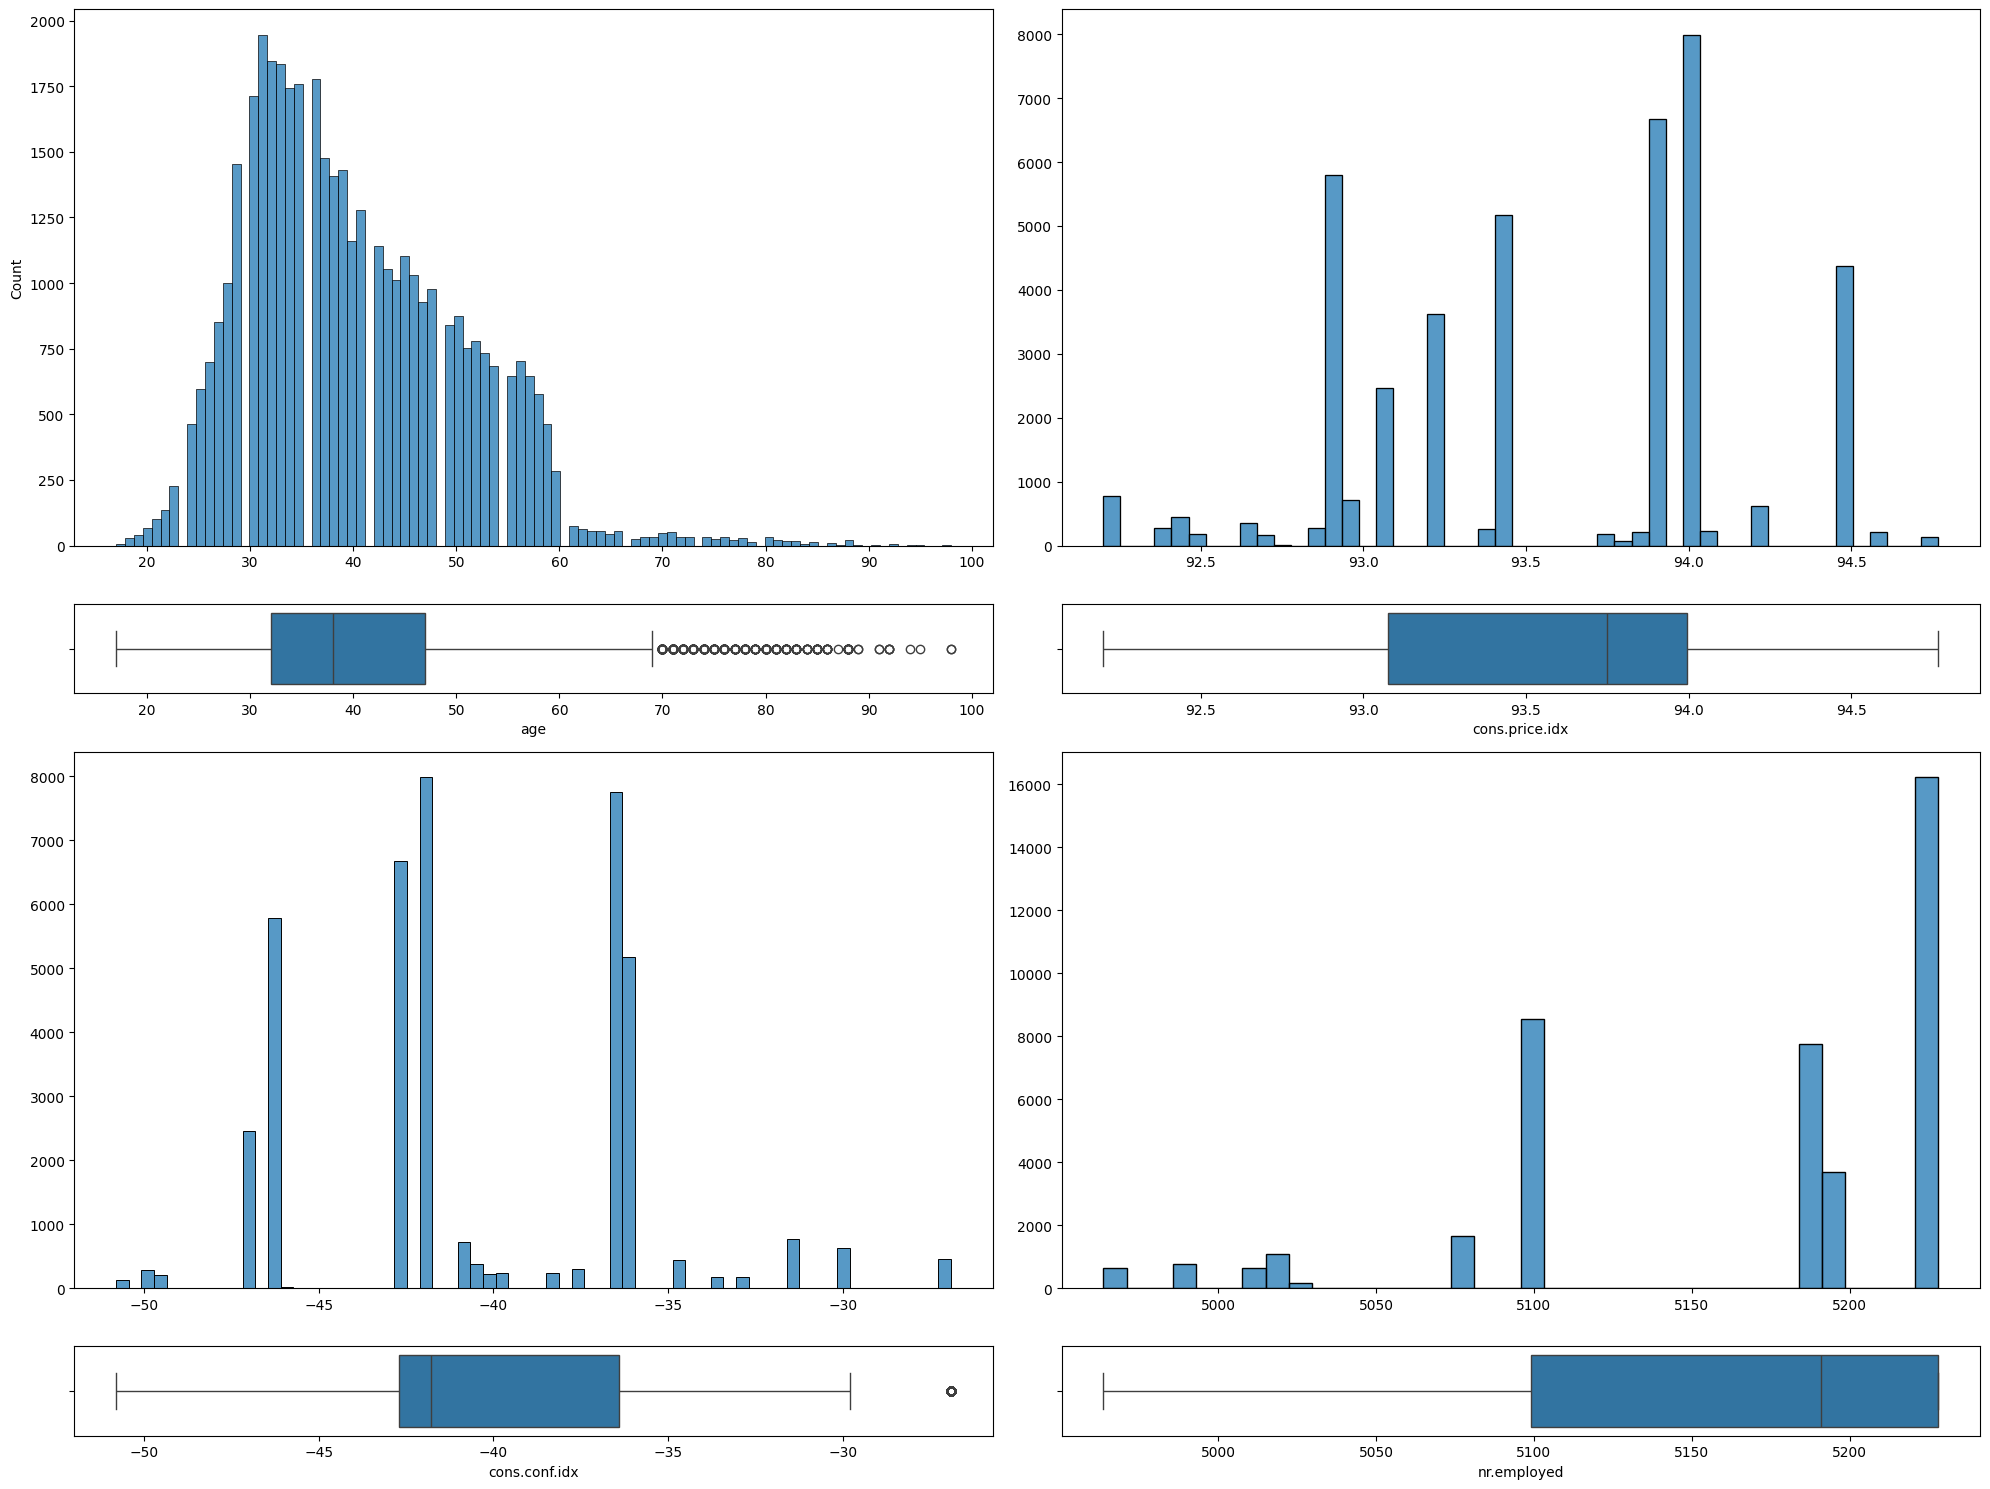

In [9]:


fig, axis = plt.subplots(4, 2, figsize = (20, 15), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "cons.price.idx")


sns.histplot(ax = axis[2, 0], data = df, x = "cons.conf.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "cons.conf.idx")

sns.histplot(ax = axis[2, 1], data = df, x = "nr.employed").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "nr.employed")


plt.tight_layout()

plt.show()

Podemos ver como las edades se condensan entre los 25 y los 60 años y la mediana esta alrededos de los 38 años y vemos valores atípicos a partir de los 70 años.

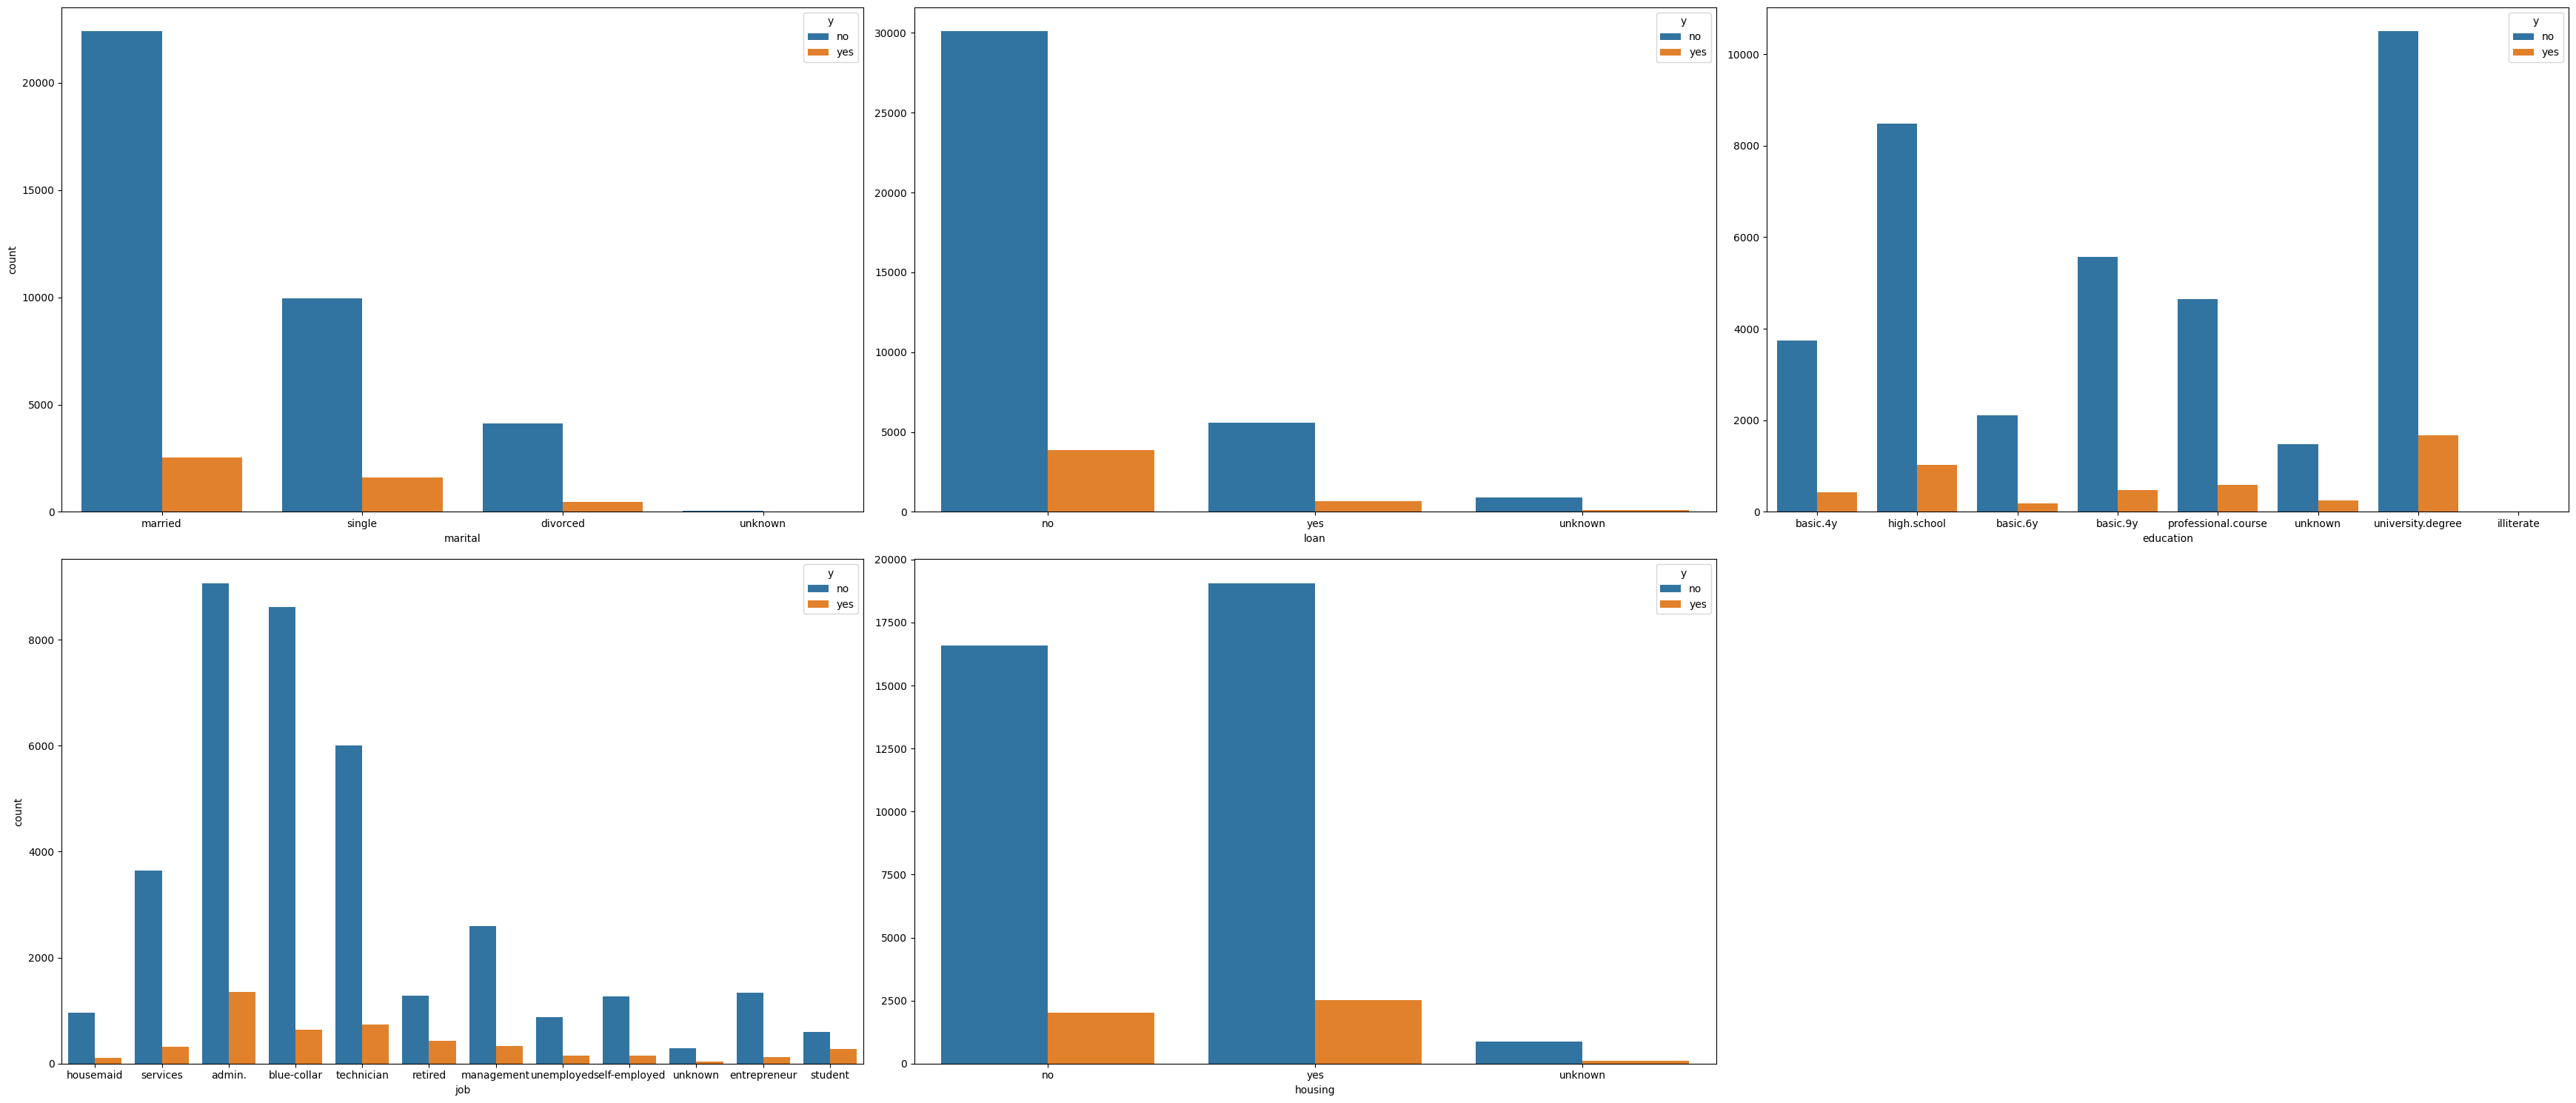

In [10]:
fig, axis = plt.subplots(2, 3, figsize = (35, 15))

sns.countplot(ax = axis[0, 0], data = df, x = "marital", hue = "y")
sns.countplot(ax = axis[0, 1], data = df, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = df, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = df, x = "job", hue = "y")
sns.countplot(ax = axis[1, 1], data = df, x = "housing", hue = "y").set(ylabel = None)

plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

Las conclusiones que podemos sacar es que los cadas y con prestamos serian menos propensos a suscribirse, mientras que los solteros y las personas con educación superior tienen más probabilidad de suscribirse. Los que tienen trabajos como administrativos y tecnicos y los que tienen casa pueden estar mas receptivos a la oferta.

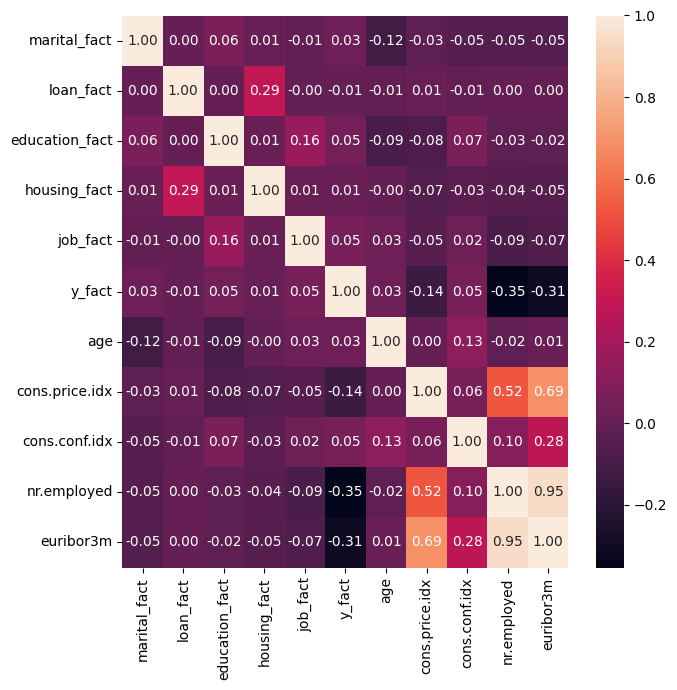

In [11]:
df["y_fact"] = pd.factorize(df["y"])[0]
df["marital_fact"] = pd.factorize(df["marital"])[0]
df["loan_fact"] = pd.factorize(df["loan"])[0]
df["education_fact"] = pd.factorize(df["education"])[0]
df["housing_fact"] = pd.factorize(df["housing"])[0]
df["job_fact"] = pd.factorize(df["job"])[0]

fig, axis = plt.subplots(figsize = (7, 7))

sns.heatmap(df[["marital_fact", "loan_fact", "education_fact", "housing_fact", "job_fact", "y_fact", "age", "cons.price.idx", "cons.conf.idx", "nr.employed", "euribor3m" ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

De este gráfico destacaríamos la correlacion entre el prestamo y la casa, dato obvio ya que podriamos presuponer que estas personas tendrían una hipoteca y la relacion entre educacion y trabajo también obvia. Con respecto a la suscripción todas las correlaciones son bastante bajas, lo que indicaría que no hay ningún factor decisivo.

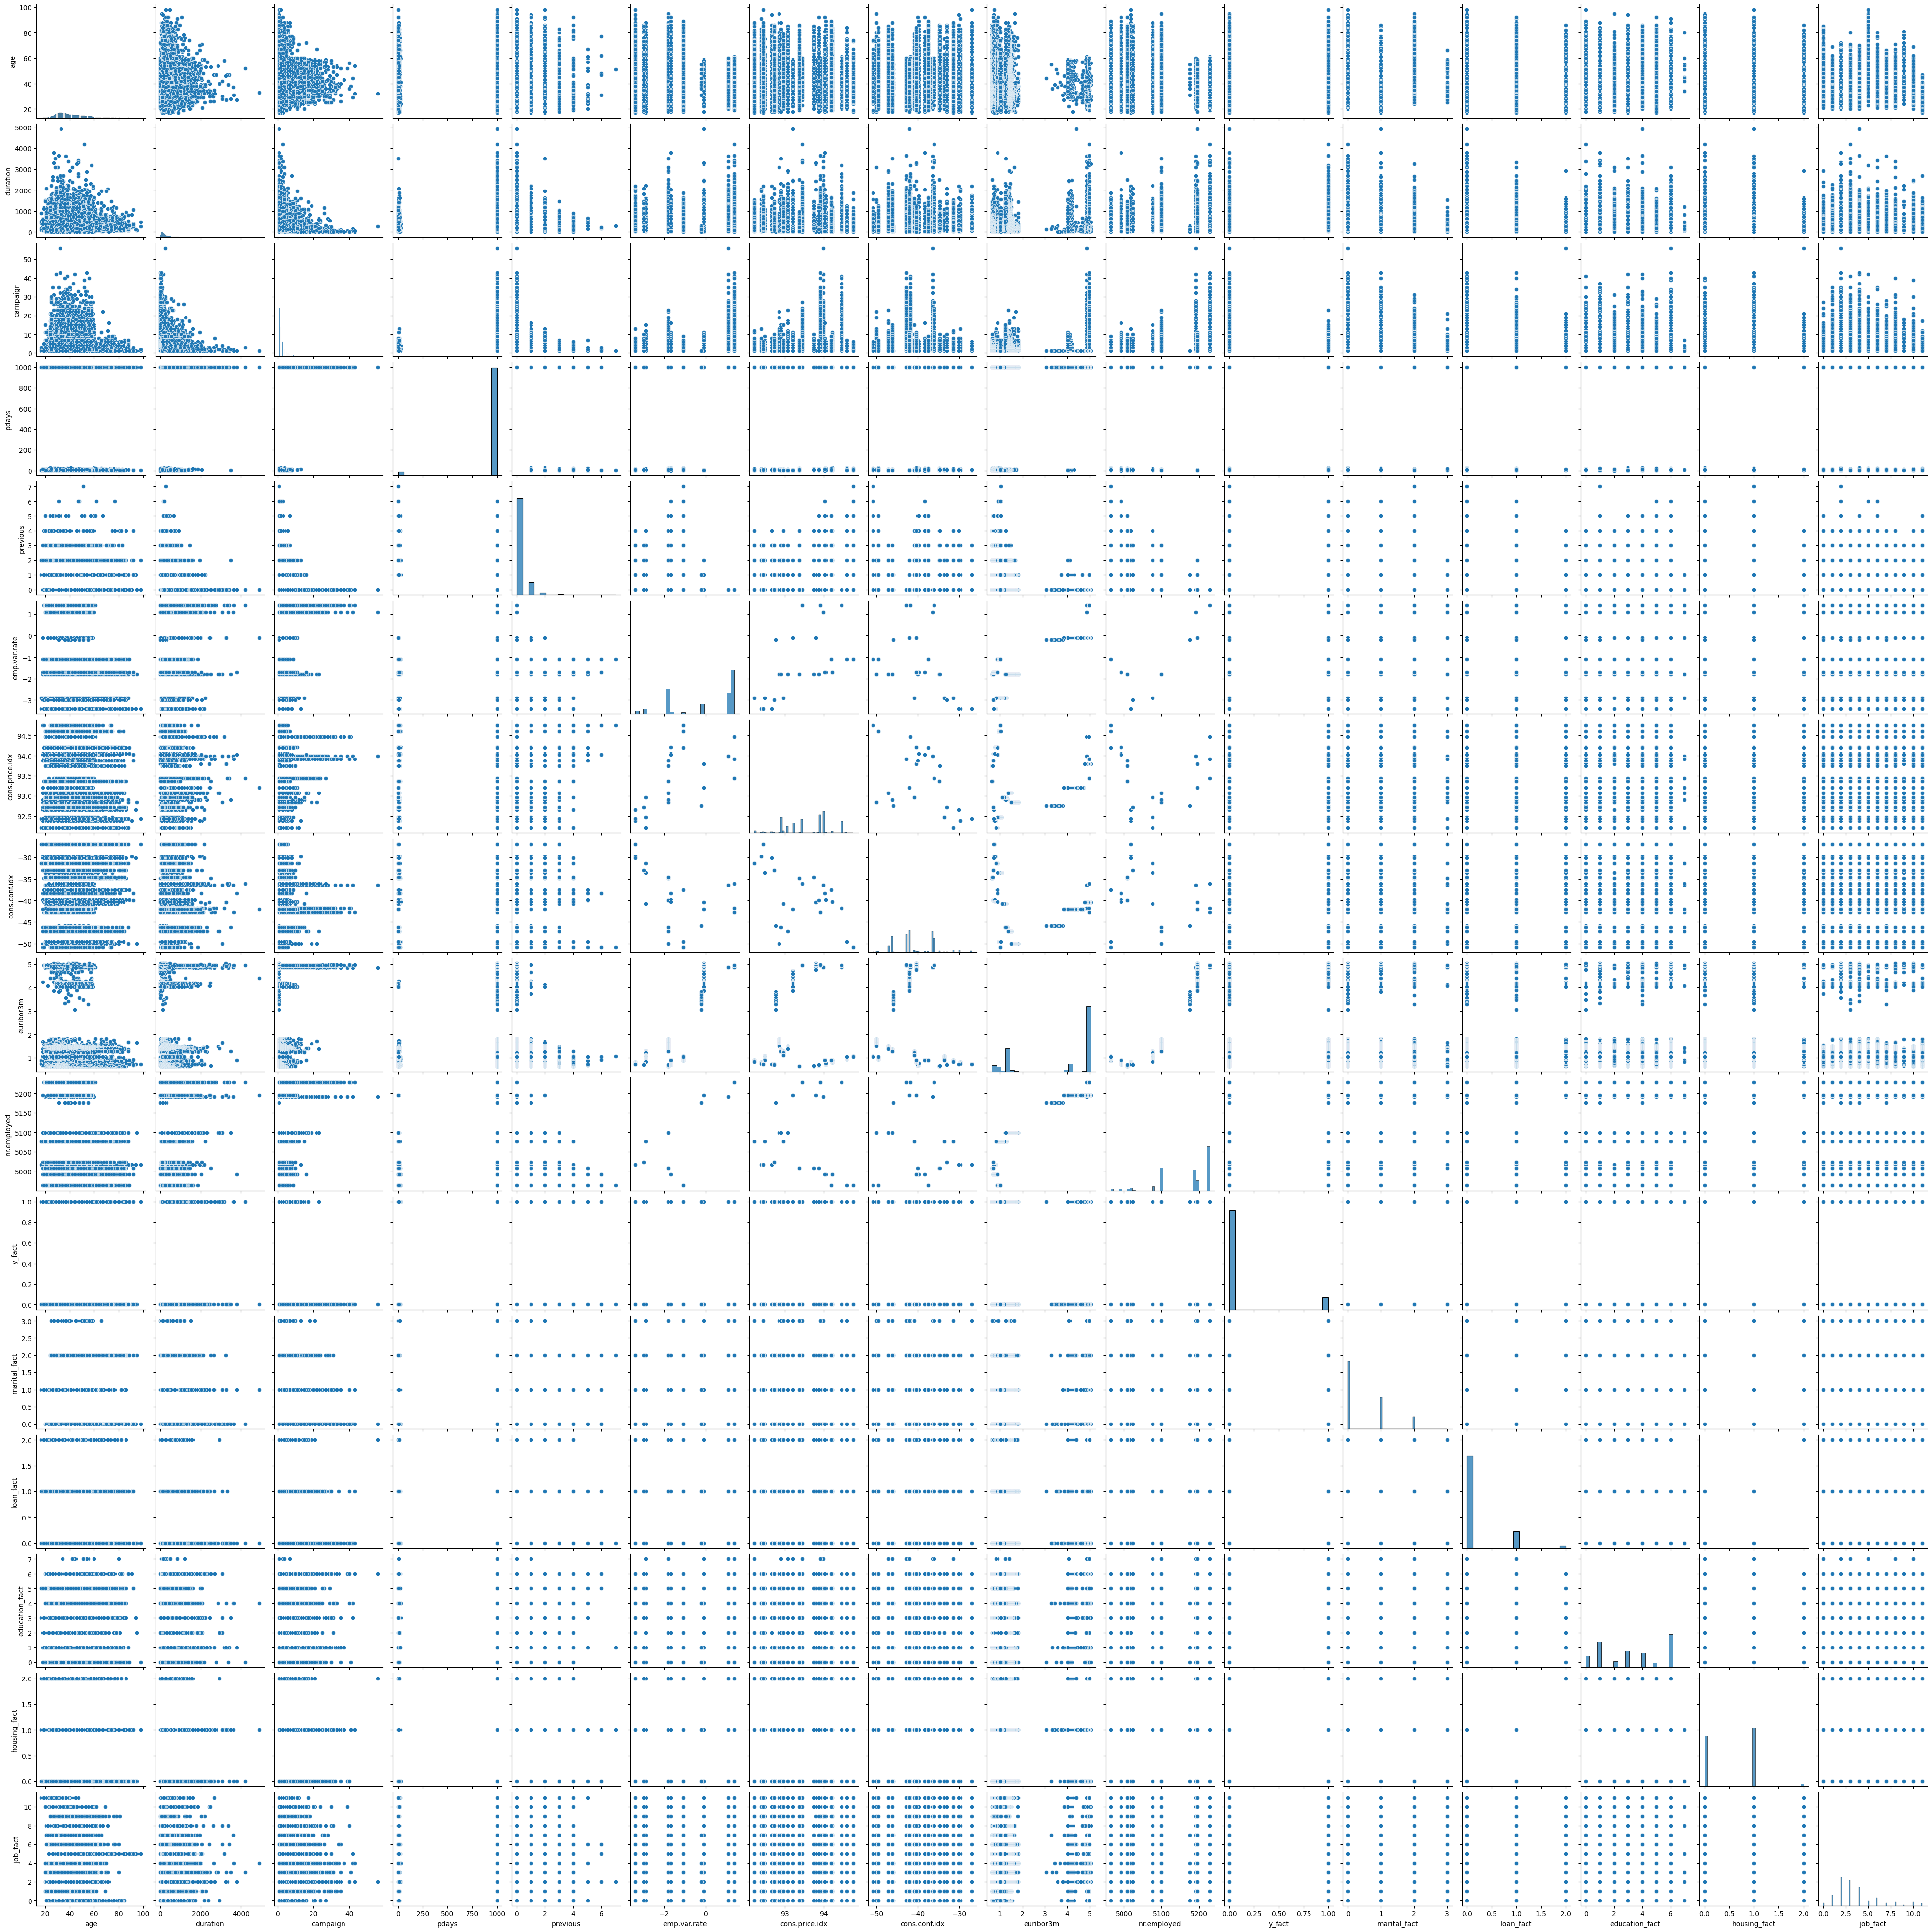

In [12]:
sns.pairplot(data = df)

In [13]:
#VALORES ATÍPICOS

df.describe().round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_fact,marital_fact,loan_fact,education_fact,housing_fact,job_fact
count,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00,41176.00
mean,40.02,258.32,2.57,962.46,0.17,0.08,93.58,-40.50,3.62,5167.03,0.11,0.51,0.20,3.28,0.57,3.67
std,10.42,259.31,2.77,186.94,0.49,1.57,0.58,4.63,1.73,72.25,0.32,0.70,0.46,2.19,0.54,2.45
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00,0.00,0.00,0.00,0.00,0.00
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.00,0.00,0.00,1.00,0.00,2.00
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00,0.00,0.00,3.00,1.00,3.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00,1.00,0.00,6.00,1.00,4.00
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00,3.00,2.00,7.00,2.00,11.00


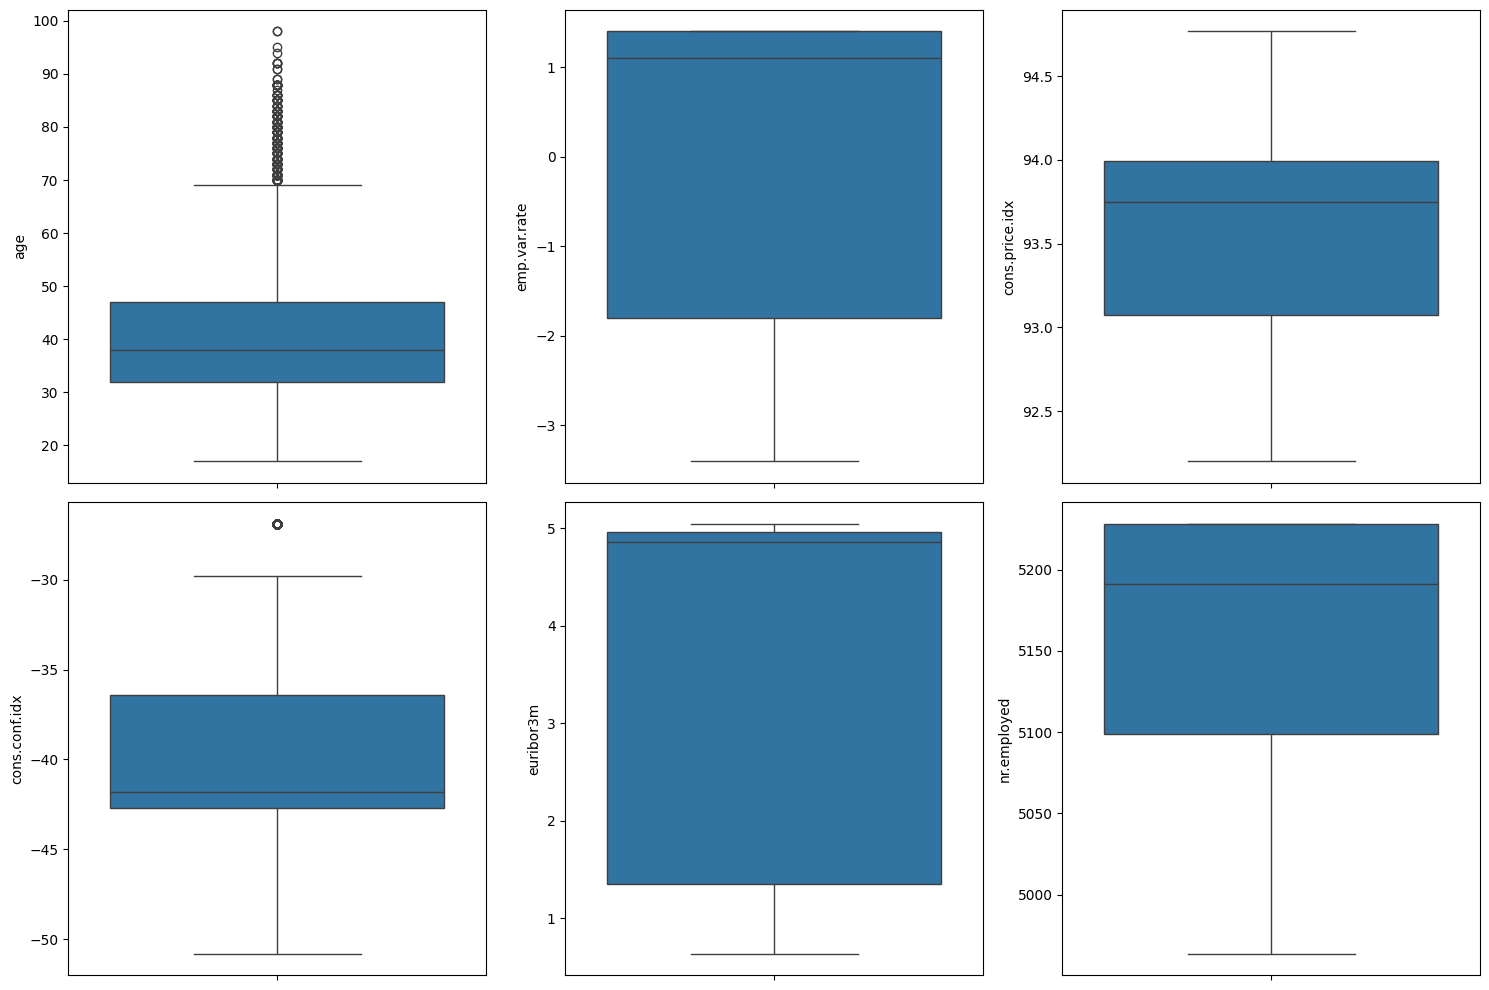

In [14]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = "age")
sns.boxplot(ax = axis[0, 1], data = df, y = "emp.var.rate")
sns.boxplot(ax = axis[0, 2], data = df, y = "cons.price.idx")
sns.boxplot(ax = axis[1, 0], data = df, y = "cons.conf.idx")
sns.boxplot(ax = axis[1, 1], data = df, y = "euribor3m")
sns.boxplot(ax = axis[1, 2], data = df, y = "nr.employed")



plt.tight_layout()

plt.show()

Vemos que hay valores atípicos en la edad y el euribor

In [15]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 69.5 y 9.5, con un rango intercuartílico de 15.0


In [16]:
edad_alta = df[df["age"] >= 70]

edad_alta

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,y_fact,marital_fact,loan_fact,education_fact,housing_fact,job_fact
27713,70,retired,divorced,basic.4y,no,yes,no,cellular,mar,mon,...,-50.0,1.811,5099.1,yes,1,2,0,0,1,5
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,-50.0,1.757,5099.1,no,0,0,1,6,0,5
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,-50.0,1.687,5099.1,no,0,0,0,6,1,5
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,-50.0,1.663,5099.1,no,0,2,0,0,1,5
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,-50.0,1.663,5099.1,yes,1,2,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,...,-49.5,1.000,4963.6,no,0,2,1,0,1,5
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,-49.5,1.016,4963.6,yes,1,0,0,0,1,5
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,-49.5,1.025,4963.6,yes,1,0,0,4,1,5
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,-50.8,1.028,4963.6,yes,1,0,0,4,1,5


Los valores atípicos sería un 0,01 de la muestra por lo que los eliminariamos por que además no tendría mucho sentido enfocar esta campaña a personas de mas de 70 años.

In [17]:
df = df[df['age'] <= 70]

In [18]:
Q1 = df['nr.employed'].quantile(0.25)
Q3 = df['nr.employed'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 5421.6 y 4905.6, con un rango intercuartílico de 129.0


In [19]:
cons_alto = df[df["nr.employed"] >= 5071.35]

cons_alto

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,y_fact,marital_fact,loan_fact,education_fact,housing_fact,job_fact
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,0,0,0,1,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,0,0,0,1,1,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,0,0,0,2,0,2
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-36.4,4.857,5191.0,no,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37882,31,management,married,university.degree,no,yes,yes,cellular,aug,mon,...,-31.4,0.821,5076.2,yes,1,0,1,6,1,6
37883,59,self-employed,married,university.degree,no,yes,no,telephone,aug,mon,...,-31.4,0.821,5076.2,no,0,0,0,6,1,8
37884,63,retired,married,university.degree,no,yes,no,cellular,aug,mon,...,-31.4,0.821,5076.2,no,0,0,0,6,1,5
37885,34,admin.,married,university.degree,no,yes,no,cellular,aug,mon,...,-31.4,0.821,5076.2,no,0,0,0,6,1,2


Hacemos la media con los valores atípicos por que son muchos.

In [20]:
upper_limit = 5421.6
lower_limit = 4905.6

media_sin_outliers = df[(df['nr.employed'] >= lower_limit) & (df['nr.employed'] <= upper_limit)]['nr.employed'].mean()

df['nr.employed'] = df['nr.employed'].apply(
    lambda x: media_sin_outliers if (x < lower_limit or x > upper_limit) else x
)

/tmp/ipykernel_807/3835737978.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nr.employed'] = df['nr.employed'].apply(


In [21]:
#VALORES FALTANTES

df.isnull().sum().sort_values(ascending=False)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_fact            0
marital_fact      0
loan_fact         0
education_fact    0
housing_fact      0
job_fact          0
dtype: int64

In [22]:
from sklearn.preprocessing import MinMaxScaler

df["job_fact"] = pd.factorize(df["job"])[0]
df["marital_fact"] = pd.factorize(df["marital"])[0]
df["education_fact"] = pd.factorize(df["education"])[0]
df["default_fact"] = pd.factorize(df["default"])[0]
df["housing_fact"] = pd.factorize(df["housing"])[0]
df["loan_fact"] = pd.factorize(df["loan"])[0]
df["contact_fact"] = pd.factorize(df["contact"])[0]
df["month_fact"] = pd.factorize(df["month"])[0]
df["day_of_week_fact"] = pd.factorize(df["day_of_week"])[0]
df["poutcome_fact"] = pd.factorize(df["poutcome"])[0]
df["y_fact"] = pd.factorize(df["y"])[0]
num_variables = ["job_fact", "marital_fact", "education_fact", "default_fact", "housing_fact", "loan_fact", "contact_fact", "month_fact", "day_of_week_fact", "poutcome_fact",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
total_data_scal.head()

/tmp/ipykernel_807/2647340836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["job_fact"] = pd.factorize(df["job"])[0]
/tmp/ipykernel_807/2647340836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["marital_fact"] = pd.factorize(df["marital"])[0]
/tmp/ipykernel_807/2647340836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,job_fact,marital_fact,education_fact,default_fact,housing_fact,loan_fact,contact_fact,month_fact,day_of_week_fact,poutcome_fact,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.735849,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.754717,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.377358,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.433962,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.735849,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [23]:
#SELECIÓN DE CARACTERÍSTICAS

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = total_data_scal
y = df["y_fact"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,poutcome_fact,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,0.937500,0.957379,0.859735
1,0.0,0.0,0.333333,0.002720,0.170510
2,0.0,0.0,0.333333,0.158694,0.512287
3,0.0,0.0,1.000000,0.981864,1.000000
4,0.0,0.0,0.937500,0.957379,0.859735


In [24]:
X_test_sel.head()

,poutcome_fact,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,0.937500,0.958059,0.859735
1,0.0,0.0,0.937500,0.958966,0.859735
2,0.0,0.0,1.000000,0.981637,1.000000
3,0.0,0.0,1.000000,0.981410,1.000000
4,0.0,0.0,0.333333,0.153933,0.512287


In [25]:
X_train_sel["y_fact"] = list(y_train)
X_test_sel["y_fact"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [26]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,poutcome_fact,previous,emp.var.rate,euribor3m,nr.employed,y_fact
0,0.0,0.0,0.937500,0.957379,0.859735,0
1,0.0,0.0,0.333333,0.002720,0.170510,0
2,0.0,0.0,0.333333,0.158694,0.512287,0
3,0.0,0.0,1.000000,0.981864,1.000000,0
4,0.0,0.0,0.937500,0.957379,0.859735,0


In [27]:
X_train = train_data.drop(["y_fact"], axis = 1)
y_train = train_data["y_fact"]
X_test = test_data.drop(["y_fact"], axis = 1)
y_test = test_data["y_fact"]

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(4076,))

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9035819430814525

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

model = LogisticRegression()

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [32]:
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [33]:
model_grid = LogisticRegression(penalty = None, C = 1000, solver = "sag")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9028459273797841

Empeora unos decimales.

In [34]:
import numpy as np
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}


random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [35]:
random_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

Mejores hiperparámetros: {'solver': 'sag', 'penalty': 'l2', 'C': np.float64(0.08858667904100823)}


In [36]:
model_random_search = LogisticRegression(penalty = None, C = np.float64(29.763514416313132), solver = "sag")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.9028459273797841

Se queda igual que el anterior